# Newton's Method vs Gradient Descent 

In this code, I'll be applying Gradient Descent on Logistic Regression and then comparing the result to the one we get after applying Second Order Optimization technique called Newton's Method on a particular Dataset.

###### Importing Libraries 

In [1]:
import pandas as pd
import matplotlib.pylab as plt1
import matplotlib.pyplot as plt2
import numpy as np
import time

###### Loading the data 

Dataset that we are using here contains 100 values of Distance cycled and the respective Calories lost. 

In [2]:
df = pd.read_csv("CalorieData.csv")
df.head()

,dist_cycled,calories
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [3]:
arr = df.as_matrix()
arr.shape

(100, 2)

Function for computing total squared error

In [4]:
def total_error(b, m, points):
    tError = 0
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        tError += (y - (m*x +b))**2
    return tError/float(len(points)) #returning total mean squared error

Now, defining the main gradient Descent function:

In [5]:
def gradient_step(cm, cb, points, lr):
    dt_db = 0
    dt_dm = 0
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        t = y - (cm*x + cb)
        dt_dm += -1*x*t
        dt_db += -1*t
        
    dt_dm = (2*dt_dm)/float(len(points))
    dt_db = (2*dt_db)/float(len(points))
    
    m = cm - (lr * dt_dm)
    b = cb - (lr * dt_db)
    
    return [m, b]


In [6]:
def gd(points, sm, sb, lr, num, early_stop_num=0, modify_lr = False):
    m = sm #initial slope
    b = sb #initial intercept
    error = []
    modify_lr_after_step = 3
    stop_num = 0
    er_decrease = 0
    
    for i in range(num):
        m,b = gradient_step(m, b, points, lr)
        err = round(total_error(b, m, points), 2) # computing mean square error and rounding to 2 decimal place
        
        if i>=1 and error[len(error)-1] == er and early_stop_num != 0:
            stop_num += 1
            
            if stop_num == early_stop_num:
                print("Executing early stopping")
                break
        else:
            stop_num = 0
                
        if modify_lr and err < total_error(b,m,points):
            er_decrease += 1
            if er_decrease % modify_lr_after_step == 0:
                print("Increasing lr for faster descent")
                lr += 0.00002
        else:
            er_decrease = 0
            lr = 0.00021
        error.append(err)
        
        print("Finished with learning rate {}".format(lr))
        return [m,b,error]
        

###### Plotting graphs to visualize the data and best fit 

In [7]:
def plot_line_data(points, m, b):
    x = points[:,0]
    y = points[:,1]
    plt1.plot(x, y, 'bo')
    plt1.plot(x, m*x + b)
    plt1.axis([0,1.5* max(x), 0, 1.3 * max(y)]) #Set the axes range.
    plt1.title("Best line.")
    plt1.text(10, 130, "m="+str(round(m,4))+"  b="+str(round(b,4)))
    plt1.show() #shows the graph.
    return

def plot_error_data(error_value):
    num_iterations = range(len(error_value))
    print('min_error and max_errors are %.2f, %.2f'%(min(error_value), max(error_value)))
    plt1.plot(num_iterations, error_value) #plots iterations vs error_value
    #plt1.axis([0,1.5*max(num_iterations), min(error_value)-5, max(error_value) + 5])
    plt1.xlabel('iterations')
    plt1.ylabel('error_value')
    # plt1.text(10,130,'Min_Error value is :'+str(min(error_value))) #Shows min error value.
    plt1.show() #shows the plot.
    return

The main function:

Starting gradient descent at b = 1, m = 0, error = 5420.637733375842
Running...
Finished with learning rate 0.00021
After 1000 iterations b = 0.009986217818693379, m = 1.5016439250404972, error = 113.90649561266578


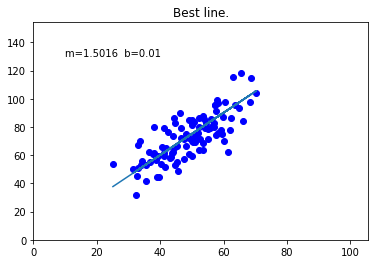

1.50164392504 0.00998621781869


In [8]:
learning_rate = 0.00021
init_m = 0
init_b = 1
iterations = 1000
points = arr
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(init_b, init_m, total_error(init_b, init_m, points)))
print("Running...")

[m, b, error] = gd(points, init_b, init_m, learning_rate, iterations, early_stop_num = 5, modify_lr = True)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(iterations, b, m, total_error(b, m, points)))
plot_line_data(points, m, b)
#plot_error_data(error)
print(m, b)